# HW 7 problem 1 

For this homework, we have collected the monthly average data for Methane from the website : [Global Monitoring Laboratory]( https://gml.noaa.gov/dv/data/). The data available on this website is in .txt format is uploaded here for this analysis. we begin with the necessary library imports .We used Pandas for the plotting , other necessary imports are given below:

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext pycodestyle_magic
%pycodestyle_on

The linting with pycodestyle magic recommended to make some line shorter but I am not able to it for some lines to avoid the errors . We are only going to take 3 columns (Time_decimal,Value,Value_std_dev).  

In [35]:
dataset = pd.read_csv('ch4.txt', skiprows=139, usecols=['time_decimal', 'value', 'value_std_dev'], sep=" ", na_values=[-999.99, -99.99])
dataset = dataset.dropna()  # dropping the raws will any null values.

1:80: E501 line too long (136 > 79 characters)


### Plot
The plot of the taken data of Mithane emission vs time (year) 

Text(0.5, 1.0, 'CH4')

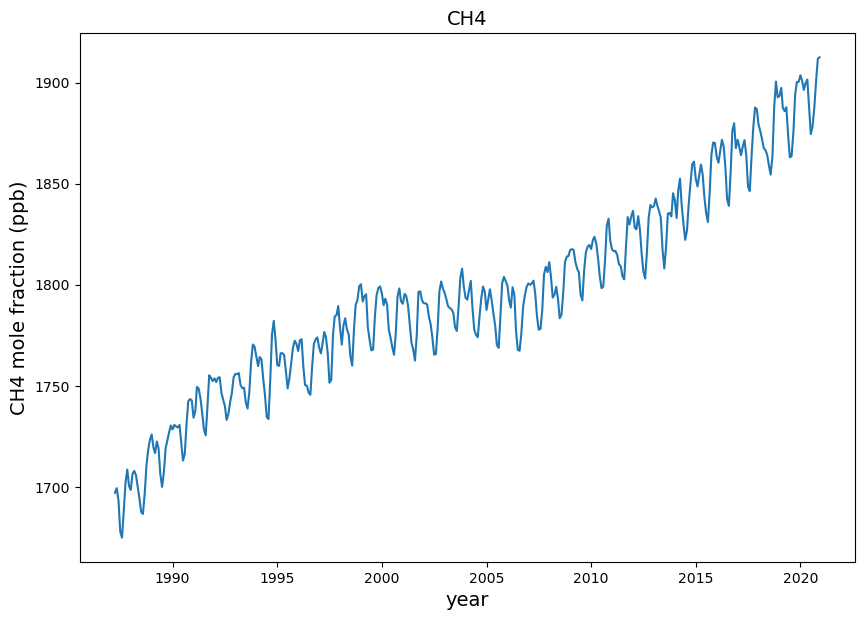

In [39]:
X_orig = dataset["time_decimal"]
Y_orig = dataset["value"]
err = dataset["value_std_dev"]
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(X_orig, Y_orig)
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('CH4 mole fraction (ppb)', fontsize=14)
ax.set_title('CH4', fontsize=14)

# Analyzing data
I am going to use the numpy fft to take the fourier transfer of our data.

First we need to find the sample rate and sample spacing 

In [40]:
samples = len(Y_orig)
years = int(X_orig.iloc[-1]-X_orig.iloc[0])
months = years * 12
sr = samples / months
ss = 1 / sr
ss

0.9777777777777777

## Plotting in frequency domain
using numpy fft lets plot the emission data using the sample rate and spacing above

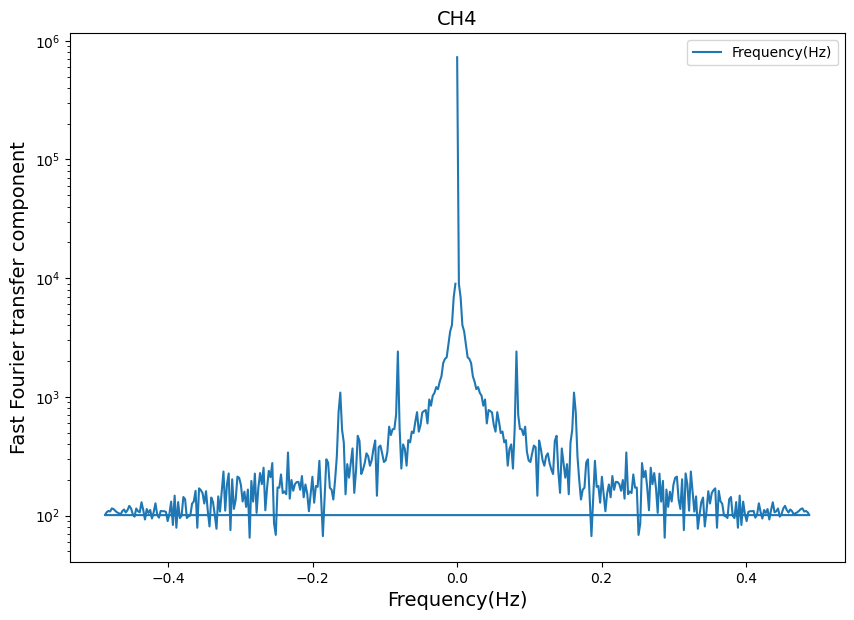

In [42]:
Y_fft = np.fft.fft(Y_orig)
freqs = np.fft.fftfreq(len(Y_fft), sr)
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(freqs, np.abs(Y_fft), label="Frequency(Hz)")
plt.yscale('log')
ax.set_xlabel('Frequency(Hz)', fontsize=14)
ax.set_ylabel('Fast Fourier transfer component', fontsize=14)
ax.set_title('CH4', fontsize=14)
ax.legend()

## Frequency of the peaks

if I put all of the picks  in an array :

In [44]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(np.abs(Y_fft), height=0)
freqs[peaks]

array([ 0.02897119,  0.03862826,  0.04345679,  0.05552812,  0.06277092,
        0.06759945,  0.07484225,  0.08208505,  0.09415638,  0.10622771,
        0.11347051,  0.12554184,  0.13761317,  0.14485597,  0.15209877,
        0.16175583,  0.18106996,  0.19072702,  0.19555556,  0.20038409,
        0.21004115,  0.21486968,  0.21969822,  0.22935528,  0.23418381,
        0.23901235,  0.24384088,  0.24866941,  0.25591221,  0.26074074,
        0.26798354,  0.27281207,  0.28005487,  0.2848834 ,  0.28971193,
        0.29454047,  0.30419753,  0.31144033,  0.31626886,  0.32351166,
        0.33075446,  0.34041152,  0.34765432,  0.35731139,  0.36213992,
        0.37903978,  0.38628258,  0.39111111,  0.39593964,  0.40559671,
        0.41042524,  0.41766804,  0.42491084,  0.42973937,  0.43698217,
        0.44422497,  0.45388203,  0.46112483,  0.47802469,  0.48285322,
       -0.48285322, -0.47802469, -0.46112483, -0.45388203, -0.44422497,
       -0.43698217, -0.42973937, -0.42491084, -0.41766804, -0.41

Using in class example this is my efort to clean up the peaks . ( the codes are taken from the example) . I have to turn off pycodestyle becaus of its conflicts with this block

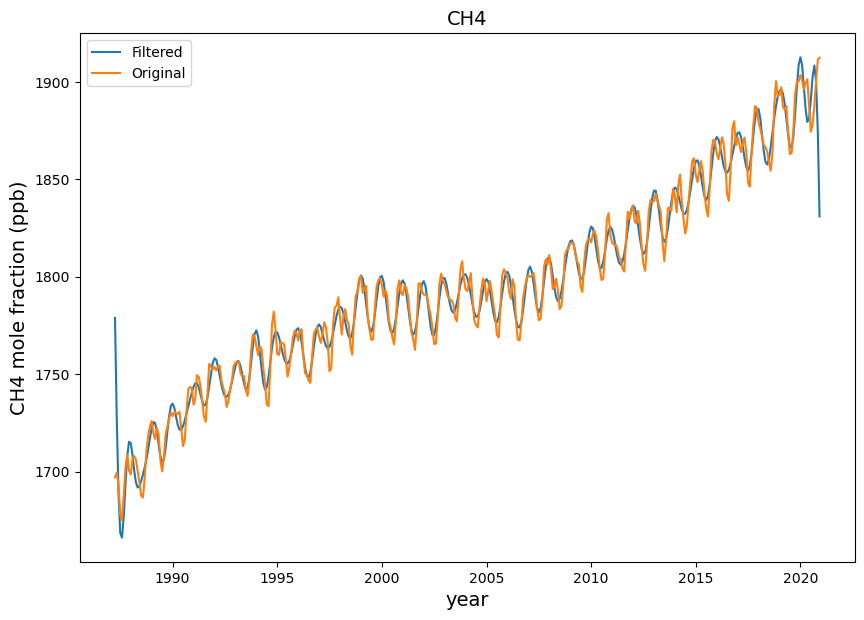

In [48]:
%pycodestyle_off

# Read like previous example with Ch4 data
x,y = X_orig, Y_orig
y_valid = y >= 0.
y = y[y_valid]

# instead of truncating, pad with values

N = len(y)
log2N = math.log(N, 2)
next_pow_of_2 = int(log2N) + 1
if log2N - int(log2N) > 0.0 :    
    ypads = np.full( 2**( next_pow_of_2) - N, 0, dtype=np.double)
    y = np.concatenate( (y, ypads) )
    x = np.arange(len(y))
    N = len(y)
                
maxfreq = 50
Y_fft[maxfreq:len(Y_fft)-maxfreq] = 0.0

# Now go back to the frequency domain. 
# Compare the data before and after filtering. 
yfiltered = ifft(Y_fft)
yfiltered_abs= abs(yfiltered)


fig, ax = plt.subplots(figsize=(10,7))
plt.plot(X_orig, yfiltered_abs, label='Filtered' )
ax.plot(X_orig, Y_orig, label='Original')
ax.set_xlabel('year',fontsize=14)
ax.set_ylabel('CH4 mole fraction (ppb)',fontsize=14)
ax.set_title('CH4',fontsize=14)
ax.legend()
%pycodestyle_on

I am not sure why my plot is not more  filtered. May be I have filtered my data (column for values) earlier already.  I was expecting it to be more filtered. May be my filtering is not well defined .
